<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#keras" data-toc-modified-id="keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>keras</a></span><ul class="toc-item"><li><span><a href="#Sequential-:-뼈대-만들기" data-toc-modified-id="Sequential-:-뼈대-만들기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sequential : 뼈대 만들기</a></span></li><li><span><a href="#compile-:-학습-전략" data-toc-modified-id="compile-:-학습-전략-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>compile : 학습 전략</a></span></li><li><span><a href="#fit-:-학습" data-toc-modified-id="fit-:-학습-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>fit : 학습</a></span></li><li><span><a href="#evaluate-:-성능평가" data-toc-modified-id="evaluate-:-성능평가-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>evaluate : 성능평가</a></span></li></ul></li><li><span><a href="#scaling" data-toc-modified-id="scaling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>scaling</a></span></li><li><span><a href="#activation" data-toc-modified-id="activation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>activation</a></span></li><li><span><a href="#advance-activation" data-toc-modified-id="advance-activation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>advance activation</a></span><ul class="toc-item"><li><span><a href="#활성함수-numpy로-만들어보기" data-toc-modified-id="활성함수-numpy로-만들어보기-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>활성함수 numpy로 만들어보기</a></span></li></ul></li><li><span><a href="#fashion-mnist" data-toc-modified-id="fashion-mnist-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>fashion mnist</a></span></li><li><span><a href="#history" data-toc-modified-id="history-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>history</a></span></li><li><span><a href="#learning-curve" data-toc-modified-id="learning-curve-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>learning curve</a></span><ul class="toc-item"><li><span><a href="#scikit-learn-:-Learning-Curve" data-toc-modified-id="scikit-learn-:-Learning-Curve-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>scikit-learn : Learning Curve</a></span></li><li><span><a href="#scikit-elarn-:-Validation-Curve" data-toc-modified-id="scikit-elarn-:-Validation-Curve-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>scikit-elarn : Validation Curve</a></span></li><li><span><a href="#keras-:-Learning-Curve" data-toc-modified-id="keras-:-Learning-Curve-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>keras : Learning Curve</a></span></li><li><span><a href="#keras-:-Validation-Curve" data-toc-modified-id="keras-:-Validation-Curve-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>keras : Validation Curve</a></span></li></ul></li><li><span><a href="#predict" data-toc-modified-id="predict-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>predict</a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## keras

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# numpy array
X_train.shape

(60000, 28, 28)

In [ ]:
# 셋 다 같음
# 첫번째 데이터만 가져옴
X_train[0, :, :]
X_train[0, ...]
X_train[0]

shape으로 이미지 데이터를 파악할 수 있다.
- 2차원 : 흑백 이미지
- 3차원 : 컬러 이미지
    - channel first : (channel, height, width)
    - channel last : (height, width, channel)
- 4차원 : 투명도가 있는 컬러 이미지(+알파 채널)

In [5]:
X_train[2].shape

(28, 28)

이미지는 uint8 로 되어있다.

In [7]:
# unsigned integer 8bit
X_train[2].dtype

dtype('uint8')

In [17]:
import matplotlib.pyplot as plt

matplotlib은 흑백이미지를 알아서 컬러로 바꿔준다.

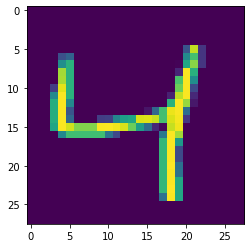

In [9]:
plt.imshow(X_train[2])

실제 흑백 이미지로 보려면 `cmap`을 지정해준다.

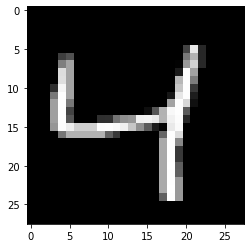

In [10]:
plt.imshow(X_train[2], cmap="gray")

`reshape`으로 2차원으로 만들면 기계학습에 쓸 수 있다.  
각 pixel을 iris의 꽃잎 폭, 길이 처럼 feature로 사용한다.

In [11]:
X_train.reshape(60000, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Sequential : 뼈대 만들기

tensorflow는 바로 서비스 가능한 수준이다.  
scikit-learn은 실무에 바로 사용하기 어렵다. 분석에 집중되었다.

In [12]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense, Flatten

`Flatten`은 데이터를 한줄로 펴주는 역할을 한다.  
numpy에서는 `flatten`과 `ravel`로 array를 한 줄로 바꿀 수 있었다.

In [ ]:
X_train[2].flatten() # copy 방식
X_train[2].ravel() # view 방식

`Flatten`은 딥러닝 이론에는 없는 개념이다.  
그러나 실제 코딩에 필요하다.

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 전처리 레이어 : 실제 학습은 안하는 레이어
                                    # 첫번째 레이어는 input_shape을 써줘야함
    Dense(16, activation="relu"),   # hidden layer 
    Dense(10, activation="softmax") # output layer
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


### compile : 학습 전략

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Error
# OneHotEncoding 안해서!
model.fit(X_train, y_train)

OneHotEncoding 방법
- scikit-learn : OneHotEncoder
- pandas : get_dummies
- keras : to_categorical

※ OneHotEncoding 안하고 LabelEncoding 그대로 쓰려면 "sparse_categorical_crossentropy" 쓴다.

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
# One Hot Encoding
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### fit : 학습

epoch마다 성능이 더 좋아진다.

In [24]:
model.fit(X_train, to_categorical(y_train), epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 2.3253 - accuracy: 0.4557
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.9976 - accuracy: 0.6651
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.7452 - accuracy: 0.7789
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6080 - accuracy: 0.8287
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4798 - accuracy: 0.8737
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4063 - accuracy: 0.8926
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3649 - accuracy: 0.9033
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3370 - accuracy: 0.9107
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3316 - accuracy: 0.9115
Epoch 10/10
60

### evaluate : 성능평가

성능평가는 `evaluate` 메소드를 이용한다.  
scikit-learn의 `score` 메소드와 역할이 같다.

In [31]:
model.evaluate(X_test, to_categorical(y_test), verbose=2)

10000/1 - 0s - loss: 0.3039 - accuracy: 0.9121


[0.35102452028393744, 0.9121]

## scaling

딥러닝은 0 ~ 1 사이에서 학습이 잘되는 경향이 있다.  
scaling은 안해도 된다. 하지만 성능 안 좋고, 학습 시간이 오래 걸린다.

In [32]:
# 전처리
# 이미지는 0 ~ 255 사이값만 있음
# MinMaxScaling
X_train = X_train / 255. 

모델 만들 때 전처리 방법은 사용할 때도 똑같이 적용해야한다.

In [33]:
X_test = X_test / 255.

In [34]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation="relu"),    
    Dense(10, activation="softmax") 
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimize="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.fit(X_train, to_categorical(y_train), epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2561 - accuracy: 0.9273
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2279 - accuracy: 0.9366
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2084 - accuracy: 0.9421
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1939 - accuracy: 0.9462
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1841 - accuracy: 0.9494
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1769 - accuracy: 0.9504
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1709 - accuracy: 0.9521
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1656 - accuracy: 0.9536
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1625 - accuracy: 0.9554
Epoch 10/10
60

In [44]:
model.evaluate(X_test, to_categorical(y_test), verbose=2)

10000/1 - 0s - loss: 0.1152 - accuracy: 0.9489


[0.19201110585331918, 0.9489]

전처리는 원래 의미를 잃어버리는 것이라고 했다. (특히 PCA는 완전 해석 불가)  
이미지는 MinMaxScaling해도 원래 의미를 잃어버리지 않는다.  
전처리 후에도 그대로 이미지로 볼 수 있다. 

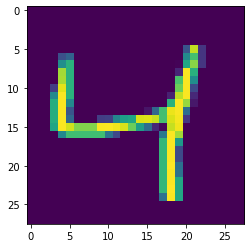

In [49]:
plt.imshow(X_train[2])

scikit-learn으로 전처리해도 똑같다.  

In [50]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
mm = MinMaxScaler()

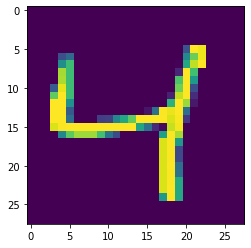

In [47]:
plt.imshow(mm.fit_transform(X_train[2]))

scaling은 값의 범위를 바꿔 주는 것이다.  
normalize라고도 하는데, 방법은 MinMaxScaling 외에도 여러가지가 있다. 

In [52]:
import mglearn

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


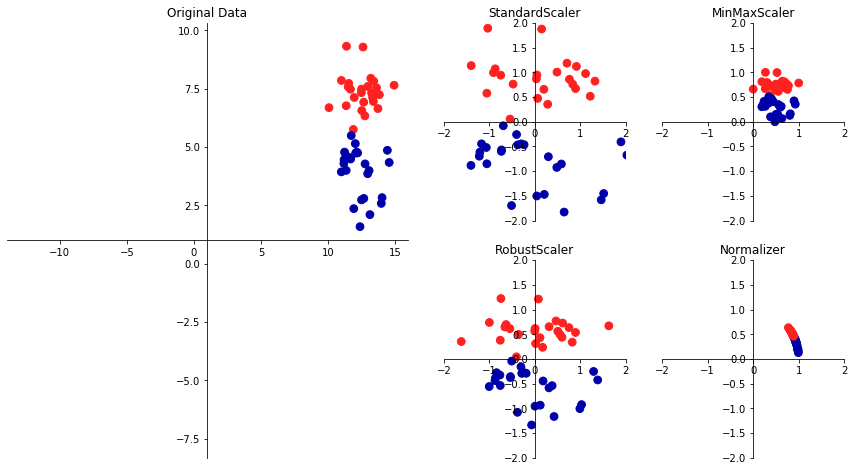

In [53]:
mglearn.plot_scaling.plot_scaling()

딥러닝도 기계학습의 일종이므로, 절차가 같다  
데이터 전처리 → 학습 → 성능 평가 → 수정 (전처리/하이퍼파라미터/알고리즘)

## activation

layer가 의미가 있으려면 활성함수로 선형함수를 쓰면 안된다.  
비선형 함수를 써야한다. 

※ 참고: [keras 공식문서의 acitivation](https://keras.io/activations/)

- step(계단함수)
    - 최초의 activation function
    - perceptron에 사용
    
    
1. linear
    - 선형은 쓰지 않는다.
2. sigmoid
    - $\frac{1}{1+e^{-x}}$
    - gradient vanishing 문제가 있다.
        - 미분값(기울기)가 0에 수렴
        - 학습이 안 된다.
    - 이론에서만 배우고 실무에 사용하는 순간 OUT
        - 단, binary 분류할때 output layer(마지막 레이어)에 사용하는 경우는 예외
        - 처음에는 hidden에 썼지만 현대에는 hidden layer(모델의 중간 레이어)에서는 사용안함 
3. tanh(하이퍼볼릭 탄젠트)
    - sigmoid를 조금 개선
    - 여전히 gradient vanishing 문제가 있다. 
4. softmax
    - 3개 이상 분류할 때 output layer에 사용한다.
    - hidden layer에는 사용하지 않음
5. ReLU (Rectified Linear Unit)
    - 딥러닝 역사에 중요한 activation
        - gradient vanishing 문제를 해결
6. Leaky ReLU
    - ReLU는 0 이하에서는 기울기 0이되서 학습이 안되는 문제가 있었다. 
    - 0 이하에서 아주 작은 기울기 값을 갖게 개선함
7. 기타 다양함
    - selu 등... 
    - 논문에서 사용함
    - 일반적으로 ReLU를 사용함

activation function의 이름만 알면 바꿔서 쓸 수 있다.

In [64]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation="selu"), # relu 대신 selu 사용
    Dense(10, activation="softmax")
])

문자열 대신에 객체를 넣을 수도 있다.

In [54]:
from tensorflow.keras.activations import relu

In [63]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation=relu),
    Dense(10, activation="softmax")
])

parameter를 보면, 옵션이 있다.  
내가 옵션을 커스터마이징해서 쓸 수 있다.  
옵션 설정 안하면 기본값 사용하는 것이다.

In [140]:
?relu

느낌상 optimizer, loss도 이렇게 이름 대신 객체로 바꿀 수 있다.  
객체를 사용하면 자동화할 수 있는 장점이 있다. 

## advance activation

advance activation은 activations 모듈에 없다.  
layers 모듈에 있다.  
layers 모듈에 있는 이유는 고급기법과 관련이 있다.(나중에 배움) 

In [65]:
from tensorflow.keras.layers import LeakyReLU

In [69]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation=LeakyReLU()), # class는 인스턴스 후 사용
    Dense(10, activation="softmax")
])

### 활성함수 numpy로 만들어보기

식만 알면 만드는 것은 어렵지 않다.  
numpy에서 수학 대부분 지원하기 떄문에 구현은 어렵지 않다.  
이미 keras에 구현되어 있어서 relu를 구현하는 것은 중요하지 않다.

In [71]:
import numpy as np

In [191]:
@np.vectorize
def relu_2(x):
    return np.max([x, 0])

In [192]:
relu_2(-1.5)

array(0.)

In [193]:
x = np.linspace(-1, 1, 100)

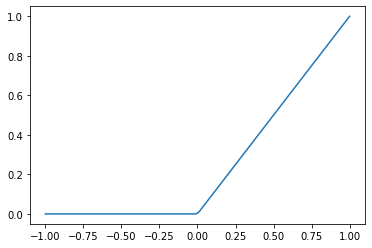

In [194]:
plt.plot(x, relu_2(x))

`maximum`, `where` 등 여러가지 방법으로 구현할 수 있다.

In [78]:
def relu_3(x):
    return np.maximum(0, x)

In [80]:
relu_3(-1.5)

0.0

In [81]:
def relu_4(x):
    return np.where(x > 0, x, 0)

In [196]:
relu_4(-1.5)

array(0.)

실무에서도 activation function을 건드리는 건 가장 마지막이다.  
학습이 안되거나 학습 속도가 느리면 상황에 맞는 걸로 바꿔보면 된다.

## fashion mnist

이번 강의는 [텐서플로우 튜토리얼](https://www.tensorflow.org/tutorials/keras/classification?hl=ko)을 참조하였습니다.

mnist는 우편번호를 인식하기 위해서 만든 숫자 손글씨 데이터셋이다. 간단한 문제였다.  
fashion mnist는 구글에서 만든 옷 이미지 데이터셋이다.   

mnist는 문제가 간단해서 KNN으로도 분류가 잘 된다.  
fashion mnist는 좀 더 복잡해서 딥러닝의 막강함을 느낄 수 있다.  
mnist보다는 문제의 난이도가 있어서 조금 고급 모델 연습용으로 많이 사용한다.  

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# hold out
# scikit-learn은 (X_train, X_test, y_train, y_test) 였음. 
# 순서 및 구조 다름 주의
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

옷에 관련한 이미지 데이터이다.

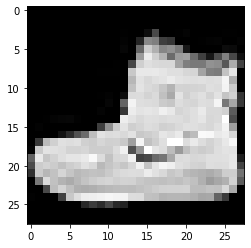

In [89]:
plt.imshow(X_train[0], cmap="gray")

mnist와 같이 unit8 타입이다.

In [90]:
X_train.dtype

dtype('uint8')

공식 튜토리얼에서는 Normalize 기법 중 MinMaxScaling을 적용하였다.  
전통적으로 0 ~ 1 이 학습 속도가 빠르고 수렴이 잘 되는 경향이 있다.  
꼭 해야하는 것은 아니다.

In [3]:
X_train = X_train / 255.0 # 관례상 소수로 나눠줌. 
                          # data type을 알아보기 쉽게 한다.

X_test = X_test / 255.0   # 사용할때도 똑같이 적용해야 함.

이미지는 1차원을 바꾸면 공간 정보를 잃어버린다.  
조금만 움직여도 pixel 전체가 바뀌어서 기계가 못 알아본다. (각 pixel을 feature로 보기 떄문)  
이미지 처리에서는 CNN 기법으로 공간 정보를 학습한다. (나중에 배움)

뼈대부터 만든다.

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Flatten

In [12]:
# 문자열로 하면 값을 못 바꾼다.  
# 객체를 쓰면 나중에 내가 바꿔서 쓸 수 있는 장점이 있다.
from tensorflow.keras.activations import relu, softmax

In [98]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation=relu),
    Dense(10, activation=softmax)
])

모델이 잘 만들어졌으면 summary가 나온다.  
안 나오면 모델이 잘 못 만들어진 것이다.

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


- `Flatten`은 학습 안하는 레이어다. 학습하게 도와주는 레이어다.  
    - `summary`에서 Param이 0이다 → 학습 안한다.  
- hidden layer(가운데 Dense)는 Param이 12560이다. → 복잡함  
    - 복잡할수록 성능이 좋다 / 학습이 오래 걸린다 / 오버피팅 걸릴 확률 높다 → 정답은 없다  

In [103]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]) # acc는 accuracy 줄임말

In [104]:
model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5949 - acc: 0.7954


데이터가 더 어려워서 mnist보다 성능이 안좋다.  
구조를 더 복잡하게 하면 성능이 더 오를 것이다.

In [105]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4293 - acc: 0.8499
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4000 - acc: 0.8586
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3819 - acc: 0.8655
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3687 - acc: 0.8680
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3589 - acc: 0.8728


모데 내부에 random 이 많이 사용되어서 결과는 항상 다르다.  
Dense도 내부에서 random으로 초기화되고, 여기저기 쓰이는 데가 많다.

In [107]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.3315 - acc: 0.8605


[0.39770894043445587, 0.8605]

## history

할당 안하고 학습하면 output이 반환되는게 거슬린다.

In [108]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3499 - acc: 0.8749
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3427 - acc: 0.8775
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3390 - acc: 0.8793
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3339 - acc: 0.8812
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3281 - acc: 0.8827


In [109]:
# 할당
history = model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3247 - acc: 0.8831
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3221 - acc: 0.8840
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3187 - acc: 0.8850
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3144 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3125 - acc: 0.8867


map, generator, groupby 같이 <괄호>로 나오는 녀석들은 바로 볼 수가 없었다.

In [110]:
history

In [111]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

학습의 중간 결과가 저장되어 있다.

In [112]:
history.history

{'loss': [0.32469743990103406,
  0.3220709990123908,
  0.3187245285709699,
  0.31444212378462155,
  0.3124832383155823],
 'acc': [0.88311666, 0.884, 0.88505, 0.8851, 0.88665]}

시각화하면 학습 상태를 관찰하기 좋다.

※ 참조: [텐서플로우 튜토리얼 - 과적합 및 과소 적합](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko)

In [117]:
# 위 링크에서 가져온 함수를 일부 수정함

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history["acc"], # 수정
                     '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history["acc"], # 수정
                 color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

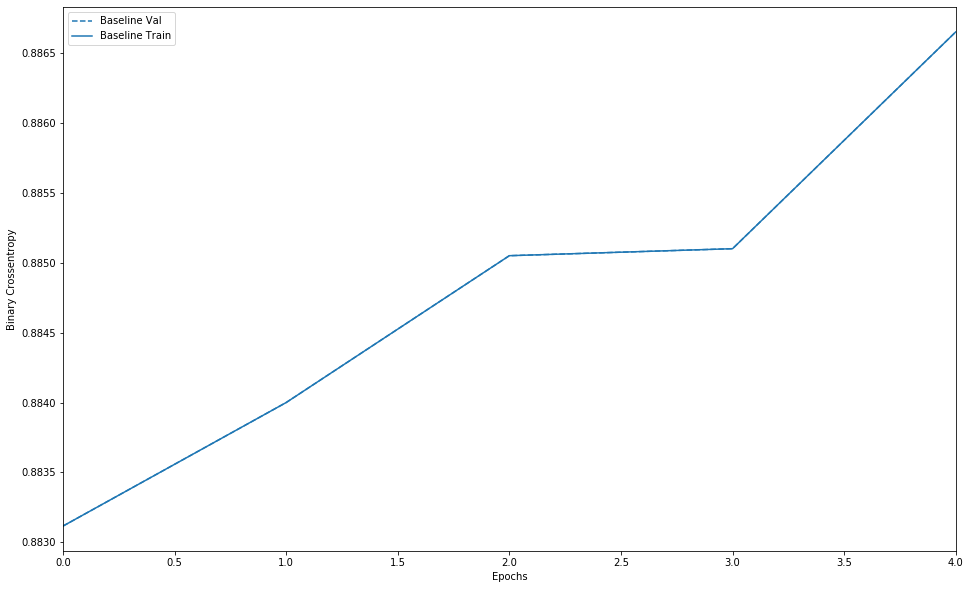

In [118]:
plot_history([('baseline', history)]) # 수정

## learning curve

keras(딥러닝)에서도 learning curve(학습 곡선)을 사용한다.  
그런데, scikit-learn(기계학습)과 차이가 있으므로 주의한다.  
**x축을 잘 봐야한다.**

### scikit-learn : Learning Curve

- x축: 데이터의 양
- 데이터의 양이 충분한지 확인하는 용도
- 데이터가 부족해서 오버피팅이 발생하는지 확인 가능

In [4]:
from sklearn.model_selection import learning_curve
from sklearn_evaluation import plot
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# 시간상 데이터 1000개만 사용
train_size, train_scores, test_scores = learning_curve(KNeighborsClassifier(), 
                                                       X_train.reshape(-1, 28*28)[:1000],
                                                       y_train[:1000], 
                                                       n_jobs=-1)

범례에 Cross-validation score라고 되어 있지만, Test score라고 생각하면 된다.

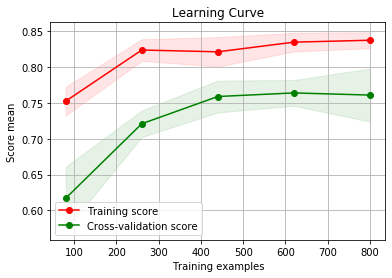

In [8]:
plot.learning_curve(train_scores, test_scores, train_size)

### scikit-elarn : Validation Curve

- x축: 하이퍼 파라미터 값(param_range)
- 하이퍼 파라미터에 따른 성능 비교하는 용도

In [5]:
from sklearn.model_selection import validation_curve

In [8]:
# 시간상 데이터 1000개만 사용

param_name = "n_neighbors"
param_range = [2, 3, 4, 5]

train_scores, test_scores = validation_curve(KNeighborsClassifier(), 
                                             X_train.reshape(60000, -1)[:1000], 
                                             y_train[:1000], 
                                             param_name=param_name,
                                             param_range=param_range,
                                             n_jobs=-1)

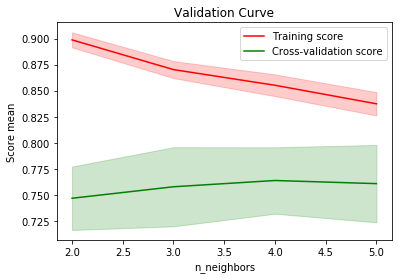

In [9]:
plot.validation_curve(train_scores,
                      test_scores,
                      param_name=param_name,
                      param_range=param_range)

### keras : Learning Curve

- x축: epochs
- epoch을 반복함에 따라 학습 상태를 관찰하는 용도
    - 딥러닝을 epoch을 돌면서 학습함(=파라미터 업데이트)
- epoch이 너무 많아서 오버피팅이 발생하는지 확인 가능

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation=relu),
    Dense(10, activation=softmax)
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]) 

keras는 `fit` 메소드에서 3way hold out을 지원한다


In [15]:
# 3way hold out 

history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 89us/sample - loss: 0.6522 - acc: 0.7815 - val_loss: 0.4929 - val_acc: 0.8274
Epoch 2/10
42000/42000 [==============================] - 3s 73us/sample - loss: 0.4597 - acc: 0.8397 - val_loss: 0.4497 - val_acc: 0.8426
Epoch 3/10
42000/42000 [==============================] - 3s 75us/sample - loss: 0.4249 - acc: 0.8506 - val_loss: 0.4215 - val_acc: 0.8540
Epoch 4/10
42000/42000 [==============================] - 3s 74us/sample - loss: 0.4035 - acc: 0.8584 - val_loss: 0.4210 - val_acc: 0.8541
Epoch 5/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.3888 - acc: 0.8620 - val_loss: 0.4169 - val_acc: 0.8536
Epoch 6/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.3780 - acc: 0.8659 - val_loss: 0.4278 - val_acc: 0.8514
Epoch 7/10
42000/42000 [==============================] - 3s 73us/sample - loss: 0.3697 - acc: 0.8691 - val_loss: 0.

딥러닝에서는 learning curve와 validation curve를 동시에 그려서 오버피팅 여부를 확인한다.

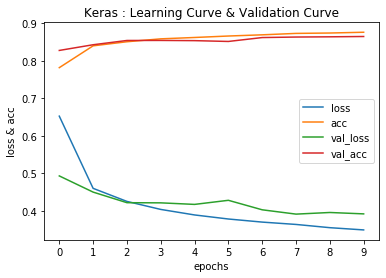

In [27]:
epochs = history.epoch
for name, value in history.history.items():
    plt.plot(epochs, value, label=name)
plt.title("Keras : Learning Curve & Validation Curve")
plt.xlabel("epochs"); plt.ylabel("loss & acc")
plt.xticks(epochs)
plt.legend()
plt.show()

### keras : Validation Curve

- scikit-learn에서 validation curve를 그려서 하이퍼 파라미터 확인했다. 
- 딥러닝에서는 validation curve를 그려서 오버피팅 여부를 확인한다.

---

train - test 분리하는 것은 공정한 평가를 하기 위해서 한다  
test로 평가하면서 최적의 모델 구조를 찾는다.  
  
데이터는 다다익선!  
실제 사용할때는 성능을 더 높인다 (=데이터를 더 많이 쓴다.)  
찾아낸 최적의 모델 구조와 모든 데이터(train + test)로 최종 학습한다.  

scikit-learn(기계학습)은 새로운 데이터로 학습하면 처음부터 학습한다.  
keras(딥러닝)은 새로운 데이터로 학습하면 현재 상태에서 이어서 학습한다.

In [28]:
# 현재 학습된 상태에서 추가 학습
model.fit(X_test, y_test)

Train on 10000 samples
10000/10000 [==============================] - 1s 58us/sample - loss: 0.4217 - acc: 0.8530


## predict

In [ ]:
# Error
model.predict(X_test[2])

딥러닝에서도 shape이 아주 중요하다. 기계학습에서보다 더 중요하다.
```
ValueError: Error when checking input: expected flatten_6_input to have 3 dimensions, but got array with shape (28, 28)
```

학습 데이터는 3차원이었다.

In [122]:
X_train.shape

(60000, 28, 28)

에러난 데이터는 2차원이다.

In [124]:
X_test[2].shape

(28, 28)

In [128]:
# 모양 맞춰주기
# 차원을 늘리는 여러 방법들
print(X_test[2][np.newaxis].shape)
print(X_test[2][None].shape)
print(np.expand_dims(X_test[2], 0).shape)

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


모양을 맞춰주면 예측할 수 있다.  
output layer에서 softmax를 썼기 때문에 확률로 반환된다.

In [129]:
model.predict(np.expand_dims(X_test[2], 0))

array([[1.2644076e-04, 9.9985588e-01, 2.0691250e-06, 2.0498749e-06,
        1.2873730e-05, 1.6169868e-16, 6.9870106e-07, 2.5375189e-09,
        4.0718678e-10, 6.3729111e-13]], dtype=float32)

확률은 모두 더하면 1이 된다.

In [132]:
# 경우에 따라서 1로 딱 안떨어질 수도 있다.(컴퓨터는 부동소수를 사용하기 때문에)
pred.sum()

1.0

In [130]:
pred = model.predict(np.expand_dims(X_test[2], 0))

`argmax`는 가장 큰 값의 인덱스를 알려준다.

In [131]:
# 1번으로 예측함
np.argmax(pred)

1

- pandas는 64bit가 기본이었다.
- keras는 32bit가 기본이다.  

⇒ 결과의 범위가 서로 조금 다르다.


※ 참고: 10^-6 이후부터는 의미가 없어서 보통 자르고 생각한다. 